## ANN

In [2]:
import glob
base_path = '../p0605/xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))
pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [3]:
len(pneumonia), len(normal)

(3875, 1341)

In [4]:
import matplotlib.pyplot as plt
import os
test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

../p0605/xray_classification_pneumonia/Dataset_compressed/train/PNEUMONIA
('../p0605/xray_classification_pneumonia/Dataset_compressed', 'train')


In [5]:
# folder name to label
labels = []
for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [6]:
import numpy as np
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
img_width = 60
img_height = 60
dataset = np.ndarray(shape=(len(file_path), img_height*img_width), dtype=np.float32)
i=0
for _file in file_path:
    img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_width, img_height))
    
    dataset[i] = img_resized.flatten()
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

In [9]:
len(X_train), len(X_test),len(y_train),len(y_test)

(4172, 1044, 4172, 1044)

In [10]:
y_train, y_test = map(lambda x: to_categorical(x),[y_train, y_test])

### 모델 생성

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
def build():
    model = Sequential()
    model.add(Dense(100,activation='relu',input_shape=(3600,)))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(2,activation='softmax'))
    
    return model

model = build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               360100    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 365,252
Trainable params: 365,252
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.predict(dataset)

163/163 [==============================] - 0s 455us/step


2024-06-07 14:37:18.295177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


array([[0.0000000e+00, 1.0000000e+00],
       [1.3006139e-15, 1.0000000e+00],
       [2.3090442e-08, 1.0000000e+00],
       ...,
       [2.5348218e-28, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

### Adam 학습

In [14]:
model_adam = build()

model_adam.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = model_adam.fit(
    X_train, y_train, validation_data=(X_test,y_test),batch_size=64,epochs=20
)

Epoch 1/20
66/66 [==============================] - 0s 3ms/step - loss: 29.1568 - accuracy: 0.7963 - val_loss: 41.8445 - val_accuracy: 0.7232
Epoch 2/20
66/66 [==============================] - 0s 2ms/step - loss: 4.9068 - accuracy: 0.8921 - val_loss: 1.5662 - val_accuracy: 0.9454
Epoch 3/20
66/66 [==============================] - 0s 2ms/step - loss: 1.8661 - accuracy: 0.9329 - val_loss: 2.7640 - val_accuracy: 0.9023
Epoch 4/20
66/66 [==============================] - 0s 2ms/step - loss: 3.1590 - accuracy: 0.9094 - val_loss: 6.4949 - val_accuracy: 0.8688
Epoch 5/20
66/66 [==============================] - 0s 2ms/step - loss: 5.9394 - accuracy: 0.8871 - val_loss: 15.6837 - val_accuracy: 0.8228
Epoch 6/20
66/66 [==============================] - 0s 2ms/step - loss: 2.9349 - accuracy: 0.9314 - val_loss: 2.7459 - val_accuracy: 0.9205
Epoch 7/20
66/66 [==============================] - 0s 2ms/step - loss: 3.7220 - accuracy: 0.9149 - val_loss: 8.9024 - val_accuracy: 0.8209
Epoch 8/20
66/66 

### 예측

In [15]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model_adam.predict(X_test)
predicted_class = np.argmax(predictions,axis=1)
true_classes = np.argmax(y_test, axis=1)

33/33 [==============================] - 0s 627us/step


### 정확도 계산

In [16]:
accuracy = np.mean(predicted_class == true_classes)
print(f'Accuracy : {accuracy*100:.2f}%')

Accuracy : 95.21%


### 시각화

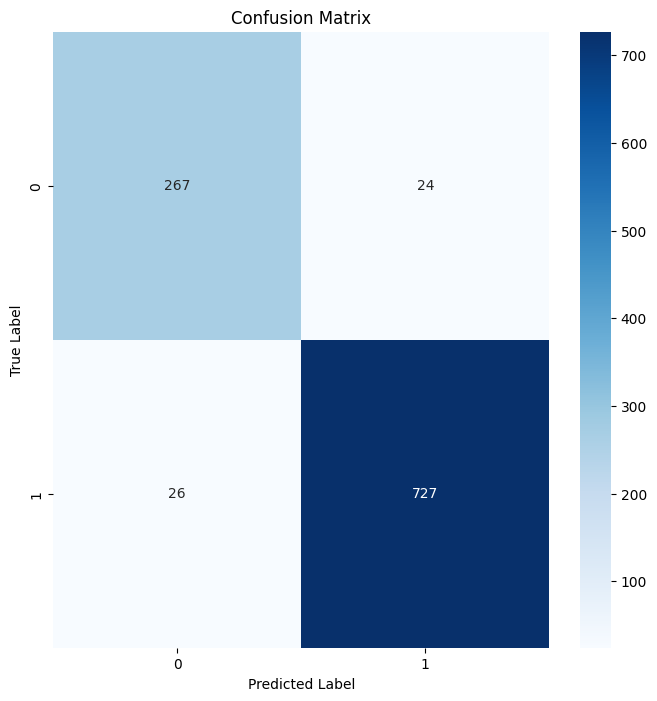

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes,predicted_class)
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Text(0, 0.5, 'Accuracy')

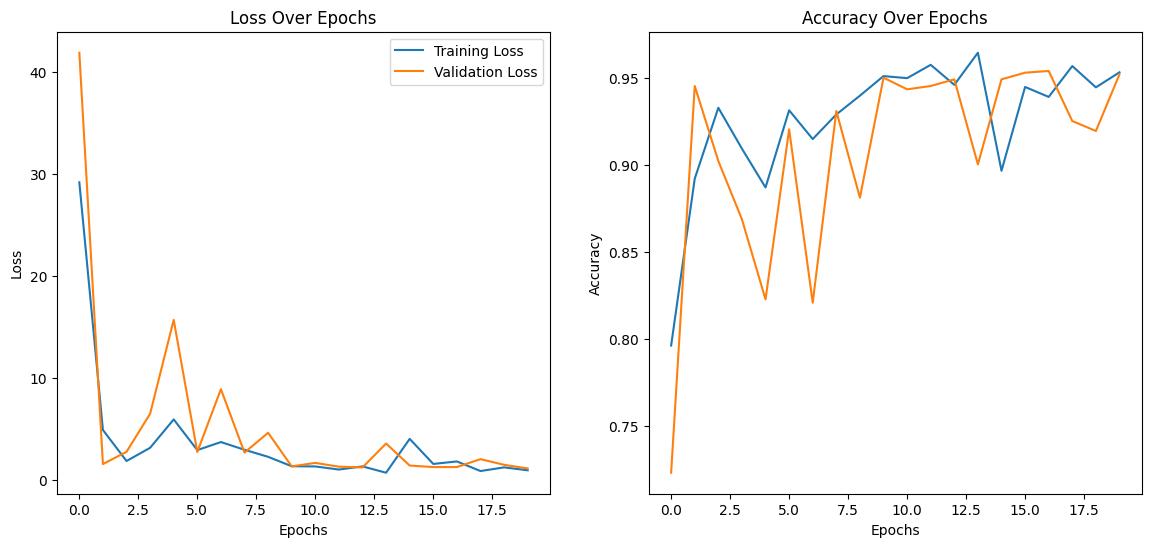

In [18]:
# Train, Val 시각화 - Loss
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## CNN

In [19]:
import glob
base_path = '../p0605/xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))
pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [43]:
label_name = {
    0: 'Normal',
    1:'Pneumonia'
}

In [20]:
import matplotlib.pyplot as plt
import os
test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

../p0605/xray_classification_pneumonia/Dataset_compressed/train/PNEUMONIA
('../p0605/xray_classification_pneumonia/Dataset_compressed', 'train')


In [21]:
# folder name to label
labels = []
for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [22]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
image_width = 60
image_height = 60
channels = 3
dataset = np.ndarray(shape=(len(file_path), image_height, image_width, channels),dtype=np.float32)
i=0
for _file in file_path:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


### 데이터 시각화

In [23]:
import cv2

im0 = cv2.imread(pneumonia[67])
im1 = cv2.imread(normal[67])

im0.shape, im1.shape

((60, 60, 3), (60, 60, 3))

(-0.5, 59.5, 59.5, -0.5)

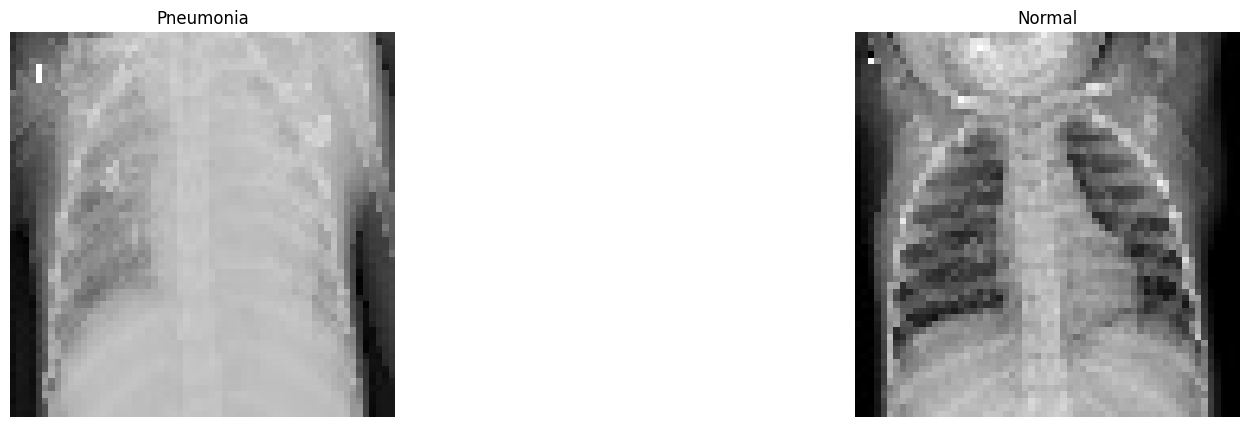

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Pneumonia');plt.imshow(im0);plt.axis('off')
plt.subplot(1,2,2)
plt.title('Normal');plt.imshow(im1);plt.axis('off')


In [25]:
# train, val, test dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(dataset,labels,test_size=0.2,random_state=321)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)
y_train,y_test,y_val = to_categorical(y_train),to_categorical(y_test),to_categorical(y_val)

# preprocess - normalization -> /255.
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_val = x_val.astype('float32')/255.

In [26]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((4172, 60, 60, 3),
 (4172, 2),
 (522, 60, 60, 3),
 (522, 2),
 (522, 60, 60, 3),
 (522, 2))

### CNN 생성

In [27]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [28]:
# Vanilla CNN
def build():
    CNN = Sequential()
    
    CNN.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(60,60,3)))
    CNN.add(MaxPooling2D(pool_size=(2,2)))
    
    CNN.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    CNN.add(MaxPooling2D(pool_size=(2,2)))
    
    CNN.add(Flatten())
    CNN.add(Dense(1000,activation='relu'))
    CNN.add(Dense(500,activation='relu'))
    CNN.add(Dense(2,activation='softmax'))
    
    return CNN

In [29]:
# metric function
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (possible_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [30]:
BATCH_SIZE = 32

### 학습

In [31]:
CNN_Adam = build()

opt = optimizers.Adam(learning_rate=0.001)
CNN_Adam.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy',
               recall_m,
               precision_m,
               f1_m]
)

In [32]:
epochs = 20
history = CNN_Adam.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    epochs=epochs,
    batch_size=BATCH_SIZE
    )

Epoch 1/20
131/131 [==============================] - 6s 46ms/step - loss: 0.2738 - accuracy: 0.9008 - recall_m: 0.9008 - precision_m: 0.9008 - f1_m: 0.9008 - val_loss: 0.1234 - val_accuracy: 0.9598 - val_recall_m: 0.9574 - val_precision_m: 0.9574 - val_f1_m: 0.9574
Epoch 2/20
131/131 [==============================] - 6s 46ms/step - loss: 0.1081 - accuracy: 0.9621 - recall_m: 0.9611 - precision_m: 0.9611 - f1_m: 0.9611 - val_loss: 0.1069 - val_accuracy: 0.9598 - val_recall_m: 0.9574 - val_precision_m: 0.9574 - val_f1_m: 0.9574
Epoch 3/20
131/131 [==============================] - 6s 44ms/step - loss: 0.1042 - accuracy: 0.9614 - recall_m: 0.9616 - precision_m: 0.9616 - f1_m: 0.9616 - val_loss: 0.0776 - val_accuracy: 0.9674 - val_recall_m: 0.9647 - val_precision_m: 0.9647 - val_f1_m: 0.9647
Epoch 4/20
131/131 [==============================] - 6s 45ms/step - loss: 0.0635 - accuracy: 0.9765 - recall_m: 0.9766 - precision_m: 0.9766 - f1_m: 0.9766 - val_loss: 0.0688 - val_accuracy: 0.9713 

### 테스트

In [33]:
score = CNN_Adam.evaluate(x_test, y_test)

17/17 [==============================] - 0s 18ms/step - loss: 0.2319 - accuracy: 0.9598 - recall_m: 0.9574 - precision_m: 0.9574 - f1_m: 0.9574


/var/folders/tl/wnyyz7fn52lb2wsy5gd0gwfw0000gn/T/ipykernel_74742/2575471450.py:9: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(key,'val_'+key)
/var/folders/tl/wnyyz7fn52lb2wsy5gd0gwfw0000gn/T/ipykernel_74742/2575471450.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(key,'val_'+key)


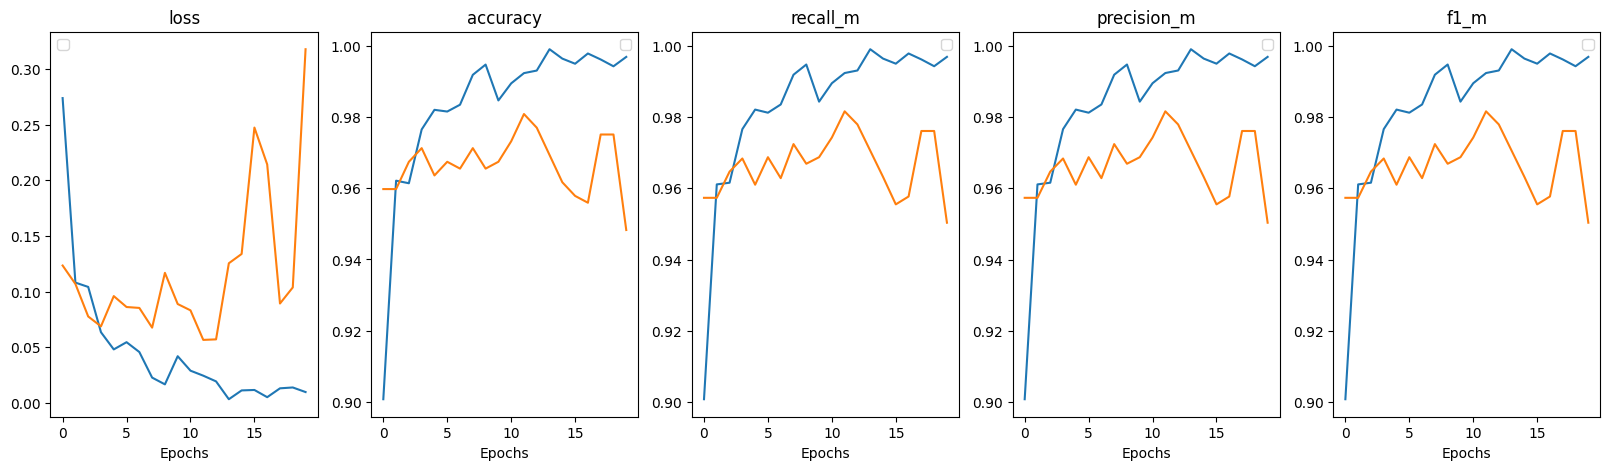

In [34]:
# 시각화
plt.figure(figsize = (20,5))
for i, key in enumerate(list(history.history.keys())[:5]):
    plt.subplot(1,5,i+1)
    plt.title(key)
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.legend(key,'val_'+key)
plt.show()

### 예측

In [35]:
y_pred=CNN_Adam.predict(x_test)

17/17 [==============================] - 0s 17ms/step


In [36]:
y_pred_argmax = np.argmax(np.array(y_pred),axis=1)
y_pred_argmax

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [37]:
# 예측 결과 시각화
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test.argmax(-1),y_pred_argmax))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       140
           1       0.95      0.99      0.97       382

    accuracy                           0.96       522
   macro avg       0.97      0.93      0.95       522
weighted avg       0.96      0.96      0.96       522



Text(50.722222222222214, 0.5, 'True Label')

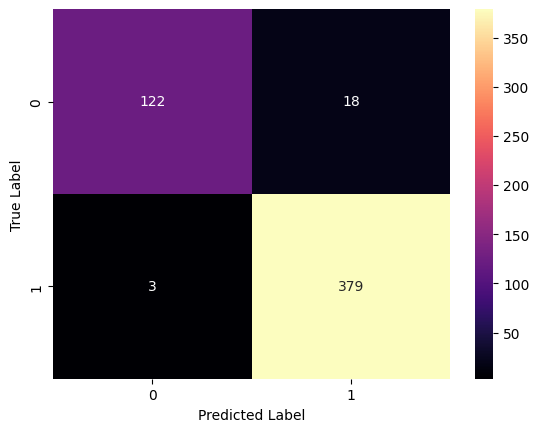

In [38]:
import seaborn as sns

heatmap = sns.heatmap(confusion_matrix(y_test.argmax(-1),y_pred_argmax),annot=True,fmt='.3g'
                      ,xticklabels=['0','1'],yticklabels=['0','1'],cmap='magma')
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('True Label')

### Inference

In [39]:
# 이미지 9개의 랜덤 추출
idx = np.random.randint(0, len(x_test), 9)

In [40]:
import matplotlib.pyplot as plt
target_x, target_y = x_test[idx],y_test[idx]
prediction = CNN_Adam.predict(target_x)
predictions = predictions.argmax(axis=-1)

1/1 [==============================] - 0s 22ms/step


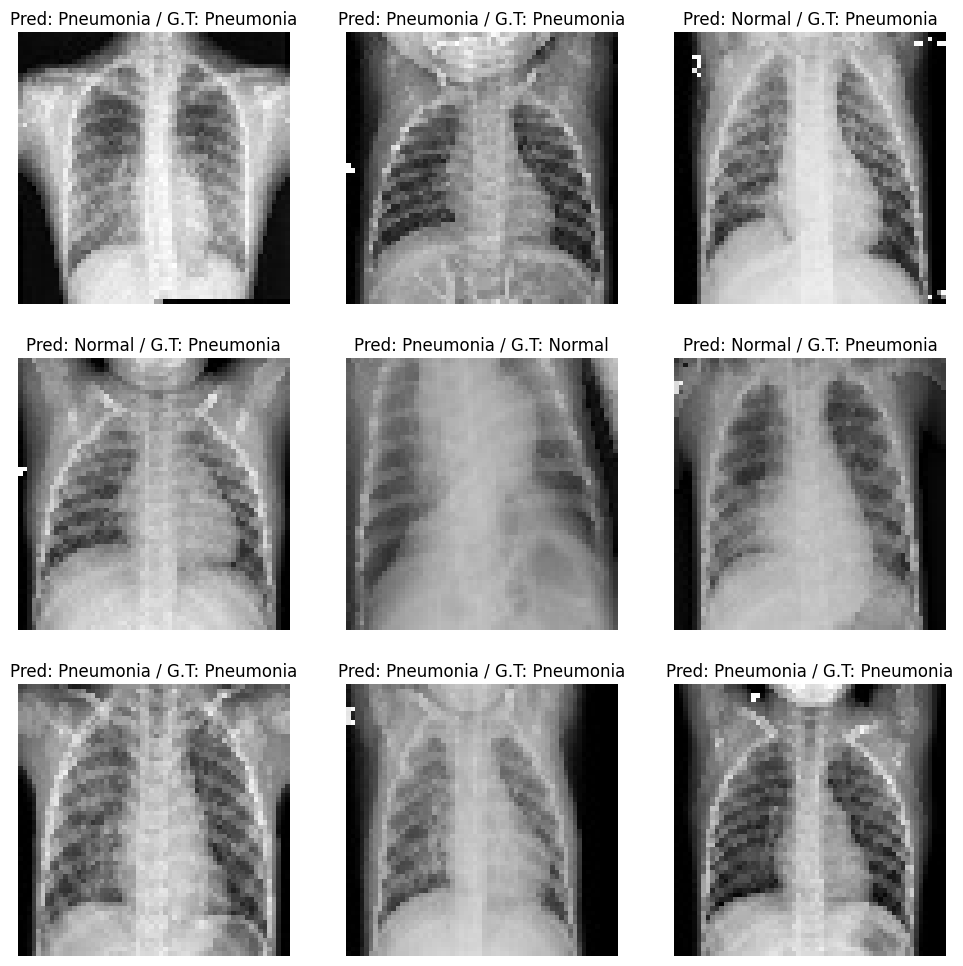

In [44]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    pred = label_name[predictions[i]]
    gth = label_name[y_test[i].argmax()]
    
    plt.title(f'Pred: {pred} / G.T: {gth}')
    
    plt.imshow(target_x[i])
    plt.axis('off')
plt.show()

## CNN with PyTorch

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

# tensor 생성
x = torch.tensor([1.,2.,3.])
print(x)
# if torch.cuda.is_available():
#     x = x.to('cuda')
#     print(x)
if torch.backends.mps.is_available():
    x = x.to('mps:0')
    print(x)
else:
    print('unable!')

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='mps:0')


### 데이터 로드 및 전처리

In [53]:
import torchvision
import torchvision.transforms as transforms

In [54]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

# 데이터셋 로딩
train = torchvision.datasets.MNIST(root='/Users/igyuwon/data/',train=True,download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test = torchvision.datasets.MNIST(root='/Users/igyuwon/data/',train=False,download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /Users/igyuwon/data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/igyuwon/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /Users/igyuwon/data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/igyuwon/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /Users/igyuwon/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/igyuwon/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting /Users/igyuwon/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/igyuwon/data/MNIST/raw



### 신경망 모델

In [59]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5) # 1 : 입력채널, 6 : 출력채널, 5: 커널(필터) 크기
        self.pool = nn.MaxPool2d(2,2) # 2 : 커널크기, 2 : 스트라이드(보폭)
        self.conv2 = nn.Conv2d(6,16,5) # 6 : 입력 채널, 16 : 출력 채널, 5: 커널 크기
        self.fc1 = nn.Linear(16*4*4,120) # 16*4*4: 입력, 120: 출력
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1,16*4*4) # flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        

### 모델 생성

In [60]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu') # Mac OS

net = SimpleCNN().to(device)

In [62]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [63]:
num_epochs = 5
train_val_loss = []
val_loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad() # 모든 변화율(gradient)을 0으로 초기화
        outputs = net(inputs) # 순전파

        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 역전파
        optimizer.step() # 변화율을 사용하여 가중치를 업데이트

        running_loss += loss.item()

        if i % 100 == 99: # 100번째 미니배치마다 손실 출력
            train_val_loss.append(running_loss / 100)
            print(f'Epoch {epoch+1}, Batch {i+1}: Train Loss: {running_loss/100}')
            running_loss = 0.0

    # 검증 손실 계산
    net.eval() # 모델을 평가 모델로 변경
    val_loss = 0.0
    with torch.no_grad():
        for ddata in test_loader:
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          val_loss += loss.item()

    val_loss /= len(test_loader)
    val_loss_values.append(val_loss)
    print(f'Epoch {epoch+1}: Validation Loss : {val_loss}')

print('Finish!')

Epoch 1, Batch 100: Train Loss: 0.5868370598554611
Epoch 1, Batch 200: Train Loss: 0.19545956388115882
Epoch 1, Batch 300: Train Loss: 0.15796484315767884
Epoch 1, Batch 400: Train Loss: 0.14910263422876596
Epoch 1, Batch 500: Train Loss: 0.11840785038657486
Epoch 1, Batch 600: Train Loss: 0.13906776602030732
Epoch 1, Batch 700: Train Loss: 0.11092514779884369
Epoch 1, Batch 800: Train Loss: 0.10677141017979011
Epoch 1, Batch 900: Train Loss: 0.10643948508193717
Epoch 1: Validation Loss : 0.003636727575212717
Epoch 2, Batch 100: Train Loss: 0.10012520178221167
Epoch 2, Batch 200: Train Loss: 0.09926784456707537
Epoch 2, Batch 300: Train Loss: 0.08249774786876514
Epoch 2, Batch 400: Train Loss: 0.1127637081197463
Epoch 2, Batch 500: Train Loss: 0.10366523525910452
Epoch 2, Batch 600: Train Loss: 0.09048631727695465
Epoch 2, Batch 700: Train Loss: 0.11359671556856483
Epoch 2, Batch 800: Train Loss: 0.11601306901313364
Epoch 2, Batch 900: Train Loss: 0.08276162420399487
Epoch 2: Validatio

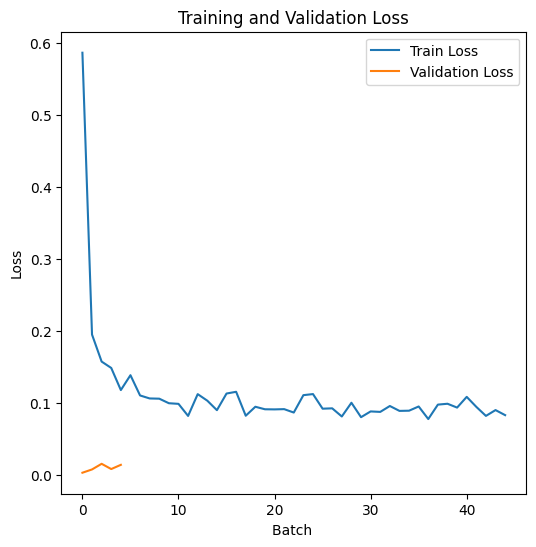

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(train_val_loss, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Batch ')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

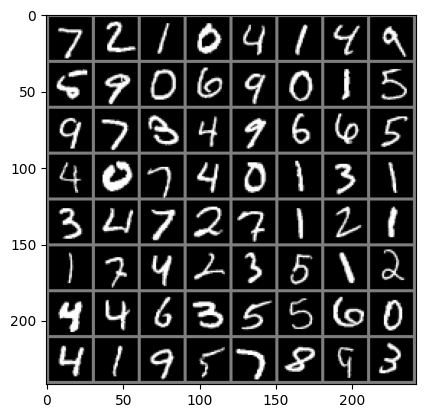

Predicted :  7 2 1 0 4 1 4 9
Ground Truth: 7 2 1 0 4 1 4 9


In [65]:
import numpy as np

def imshow(img):
  img = img /2+0.5 # 역정규화
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

# 테스트 데이터 예측
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images))

# 예측 출력
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs,1)

# 예측 결과와 실제 레이블 출력
print('Predicted : ',' '.join(f'{predicted[j].item()}' for j in range(8)))
print('Ground Truth:',' '.join(f'{labels[j].item()}' for j in range(8)))